<a href="https://colab.research.google.com/github/navilaufm/ML_LR_rainfall_MGGT/blob/main/Norman_Avila_ML_LR_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://github.com/navilaufm/ML_LR_rainfall_MGGT/raw/main/metar_data.csv')

In [3]:
data.head()

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,0,0,0


In [4]:
## create a date field to get month, day, year
data['day_date'] = pd.to_datetime(data['day_date'])
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,pcp_hrs,pcp,pcp_yesterday
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,0,0,0
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,0,0,0
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,0,0,0
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,0,0,0
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,0,0,0
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,0,0,1
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,0,0,0
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,0,0,0


In [5]:
data['year'] = data['day_date'].dt.year
data['month'] = data['day_date'].dt.month
data['day'] = data['day_date'].dt.day
data

,dia,day_date,tmp_9am,dew_9am,hum_9am,wnd_9am,wdd_9am,spd_9am,alt_9am,cig_9am,pcp_hrs,pcp,pcp_yesterday,year,month,day
0,2001-01-01 00:00:00.000,2001-01-01,17.0,10.0,59,360,N,6.2,1026.1,6000,0,0,0,2001,1,1
1,2001-01-02 00:00:00.000,2001-01-02,18.2,13.2,73,20,N,9.3,1027.1,22000,0,0,0,2001,1,2
2,2001-01-03 00:00:00.000,2001-01-03,18.0,10.5,58,360,N,11.3,1028.1,22000,0,0,0,2001,1,3
3,2001-01-04 00:00:00.000,2001-01-04,15.2,9.2,61,360,N,12.9,1029.1,22000,0,0,0,2001,1,4
4,2001-01-05 00:00:00.000,2001-01-05,15.0,10.0,67,360,N,9.3,1027.1,22000,0,0,0,2001,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2020-12-27 00:00:00.000,2020-12-27,14.0,11.0,79,40,N,6.2,1027.0,366,0,0,0,2020,12,27
6776,2020-12-28 00:00:00.000,2020-12-28,14.0,10.0,71,30,N,7.2,1028.0,549,0,0,1,2020,12,28
6777,2020-12-29 00:00:00.000,2020-12-29,16.0,10.0,63,360,N,8.2,1028.0,99999,0,0,0,2020,12,29
6778,2020-12-30 00:00:00.000,2020-12-30,17.0,13.0,76,360,N,2.1,1025.0,99999,0,0,0,2020,12,30


In [6]:
# create dummy variables of wind direction feactures features
data = pd.get_dummies(data, columns=['wdd_9am'])
data.T

,0,1,2,3,4,5,6,7,8,9,...,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779
dia,2001-01-01 00:00:00.000,2001-01-02 00:00:00.000,2001-01-03 00:00:00.000,2001-01-04 00:00:00.000,2001-01-05 00:00:00.000,2001-01-06 00:00:00.000,2001-01-07 00:00:00.000,2001-01-08 00:00:00.000,2001-01-09 00:00:00.000,2001-01-10 00:00:00.000,...,2020-12-22 00:00:00.000,2020-12-23 00:00:00.000,2020-12-24 00:00:00.000,2020-12-25 00:00:00.000,2020-12-26 00:00:00.000,2020-12-27 00:00:00.000,2020-12-28 00:00:00.000,2020-12-29 00:00:00.000,2020-12-30 00:00:00.000,2020-12-31 00:00:00.000
day_date,2001-01-01 00:00:00,2001-01-02 00:00:00,2001-01-03 00:00:00,2001-01-04 00:00:00,2001-01-05 00:00:00,2001-01-06 00:00:00,2001-01-07 00:00:00,2001-01-08 00:00:00,2001-01-09 00:00:00,2001-01-10 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
tmp_9am,17.0,18.2,18.0,15.2,15.0,14.8,16.8,17.8,16.0,16.6,...,18.0,19.0,19.0,19.0,14.0,14.0,14.0,16.0,17.0,19.0
dew_9am,10.0,13.2,10.5,9.2,10.0,11.2,11.0,13.2,11.0,9.3,...,14.0,13.0,14.0,11.0,9.0,11.0,10.0,10.0,13.0,15.0
hum_9am,59,73,58,61,67,76,65,74,69,56,...,78,68,74,58,64,79,71,63,76,79
wnd_9am,360,20,360,360,360,30,180,360,360,360,...,360,360,180,30,360,40,30,360,360,180
spd_9am,6.2,9.3,11.3,12.9,9.3,5.1,2.1,2.1,9.3,7.2,...,7.2,7.2,2.1,14.4,8.2,6.2,7.2,8.2,2.1,3.1
alt_9am,1026.1,1027.1,1028.1,1029.1,1027.1,1025.1,1023.0,1024.0,1026.1,1027.1,...,1028.0,1028.0,1027.0,1028.0,1028.0,1027.0,1028.0,1028.0,1025.0,1024.0
cig_9am,6000,22000,22000,22000,22000,22000,22000,22000,22000,22000,...,99999,99999,99999,99999,99999,366,549,99999,99999,2438
pcp_hrs,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dia            6780 non-null   object        
 1   day_date       6780 non-null   datetime64[ns]
 2   tmp_9am        6780 non-null   float64       
 3   dew_9am        6780 non-null   float64       
 4   hum_9am        6780 non-null   int64         
 5   wnd_9am        6780 non-null   int64         
 6   spd_9am        6779 non-null   float64       
 7   alt_9am        6752 non-null   float64       
 8   cig_9am        6780 non-null   int64         
 9   pcp_hrs        6780 non-null   int64         
 10  pcp            6780 non-null   int64         
 11  pcp_yesterday  6780 non-null   int64         
 12  year           6780 non-null   int64         
 13  month          6780 non-null   int64         
 14  day            6780 non-null   int64         
 15  wdd_9am_CALM   6780 n

In [8]:
data['cig_9am'].unique() ##todo check if this values can be dummied.

array([ 6000, 22000,   420,   510,   180,   360,  2100,   480,   390,
         450,   600,  4500,  2400,   540, 10500,  2700,  3000,   900,
         120,   240,   750,   660, 99999,   300,  3600,   720,  1800,
          90,    60,  6096,   427,   396,   305,   488,  2438,  3048,
         457,   549,  2743,   610,   518,   366,  2134,  1829,   671,
          61,   183,  1981,   122,  3658,   244])

In [108]:
#data = pd.get_dummies(data, columns=['cig_9am'])
#data

## no relevant variable and correlation after dummies. so reverted

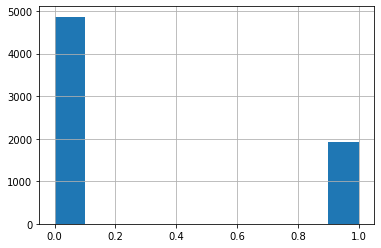

In [17]:
data["pcp"].hist() ##this is the value wanted to predict if will rain in afternoon

In [18]:
data.columns

Index(['dia', 'day_date', 'tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
       'spd_9am', 'alt_9am', 'cig_9am', 'pcp_hrs', 'pcp', 'pcp_yesterday',
       'year', 'month', 'day', 'wdd_9am_CALM', 'wdd_9am_E', 'wdd_9am_N',
       'wdd_9am_S', 'wdd_9am_W'],
      dtype='object')

In [22]:
import seaborn as sns

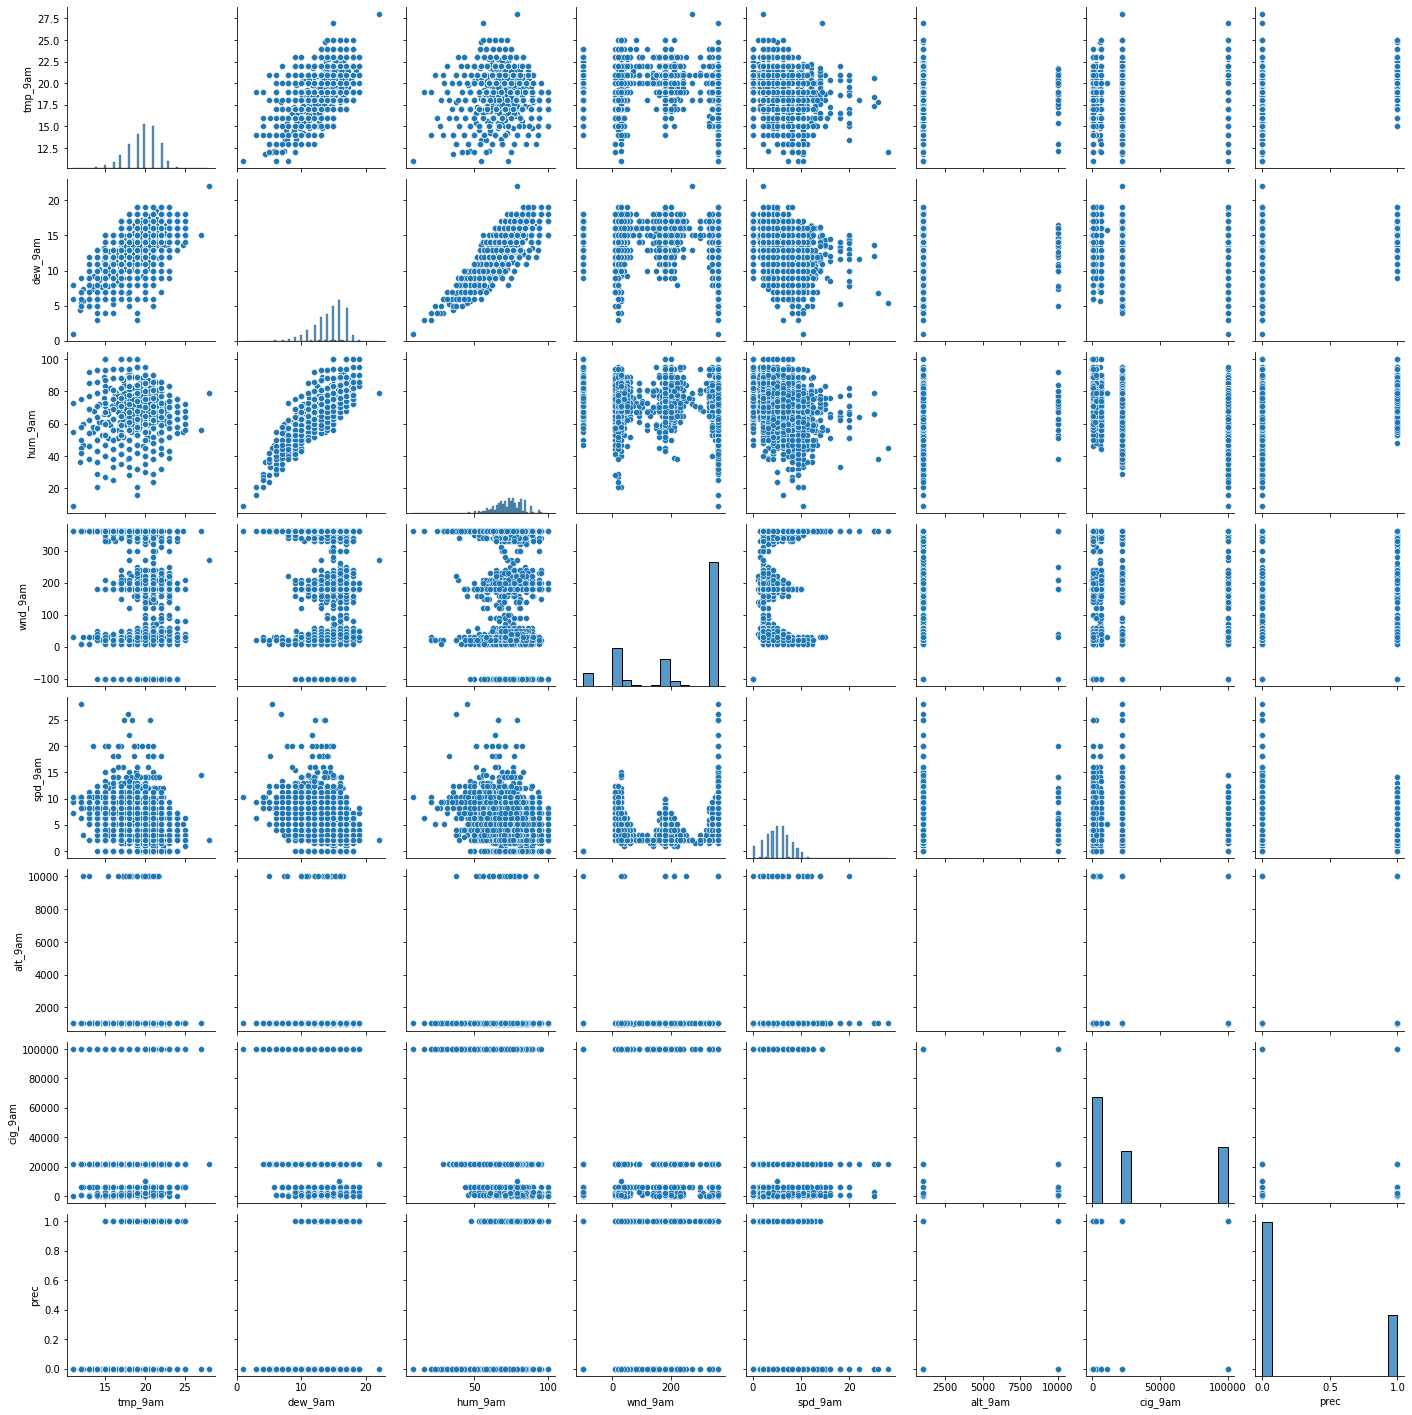

In [111]:
sns.pairplot(data[
        ['tmp_9am', 'dew_9am', 'hum_9am', 'wnd_9am',
       'spd_9am', 'alt_9am', 'cig_9am', 'pcp','pcp_yesterday']        
])

In [20]:
data.pcp.isnull().sum() ##no null values

0

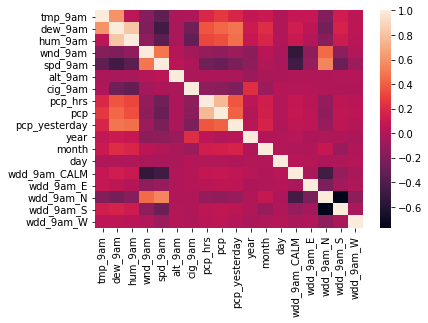

In [23]:
sns.heatmap(data.corr())

In [24]:
data_corr = data.corr()
data_corr

,tmp_9am,dew_9am,hum_9am,wnd_9am,spd_9am,alt_9am,cig_9am,pcp_hrs,pcp,pcp_yesterday,year,month,day,wdd_9am_CALM,wdd_9am_E,wdd_9am_N,wdd_9am_S,wdd_9am_W
tmp_9am,1.000000,0.601677,0.048769,-0.170753,-0.334802,-0.029723,-0.000247,0.187719,0.260427,0.177868,0.071193,0.107102,-0.001883,0.080840,0.085096,-0.188946,0.130632,0.046850
dew_9am,0.601677,1.000000,0.821260,-0.203346,-0.463452,-0.032328,-0.258362,0.369979,0.436143,0.482320,0.113799,0.212347,-0.003122,0.129221,0.058540,-0.238856,0.163961,0.058204
hum_9am,0.048769,0.821260,1.000000,-0.132809,-0.343256,-0.021322,-0.318477,0.317907,0.347378,0.460962,0.089004,0.179812,-0.003532,0.103012,0.011035,-0.166905,0.116889,0.037348
wnd_9am,-0.170753,-0.203346,-0.132809,1.000000,0.490808,0.021524,-0.055355,-0.109666,-0.128314,-0.084230,-0.152861,0.041434,-0.022132,-0.529926,-0.130240,0.451913,-0.141834,0.008782
spd_9am,-0.334802,-0.463452,-0.343256,0.490808,1.000000,0.041553,-0.014568,-0.257088,-0.288978,-0.214650,-0.141678,0.004569,-0.031483,-0.471238,-0.106739,0.547153,-0.280893,-0.081022
alt_9am,-0.029723,-0.032328,-0.021322,0.021524,0.041553,1.000000,-0.018815,-0.013505,-0.013114,-0.023294,-0.091174,-0.023442,-0.025675,-0.007563,-0.008257,-0.004709,0.008141,0.024117
cig_9am,-0.000247,-0.258362,-0.318477,-0.055355,-0.014568,-0.018815,1.000000,-0.135215,-0.157288,-0.204219,0.222581,-0.081402,0.021087,0.014698,0.017227,-0.004328,-0.009552,-0.003493
pcp_hrs,0.187719,0.369979,0.317907,-0.109666,-0.257088,-0.013505,-0.135215,1.000000,0.769080,0.371543,0.046589,0.136282,0.008415,0.076656,0.042301,-0.110331,0.058555,0.031387
pcp,0.260427,0.436143,0.347378,-0.128314,-0.288978,-0.013114,-0.157288,0.769080,1.000000,0.413329,0.009842,0.147885,0.009875,0.090304,0.053177,-0.131419,0.064914,0.058722
pcp_yesterday,0.177868,0.482320,0.460962,-0.084230,-0.214650,-0.023294,-0.204219,0.371543,0.413329,1.000000,0.037523,0.168160,-0.001231,0.060572,0.047738,-0.096910,0.053150,0.023785


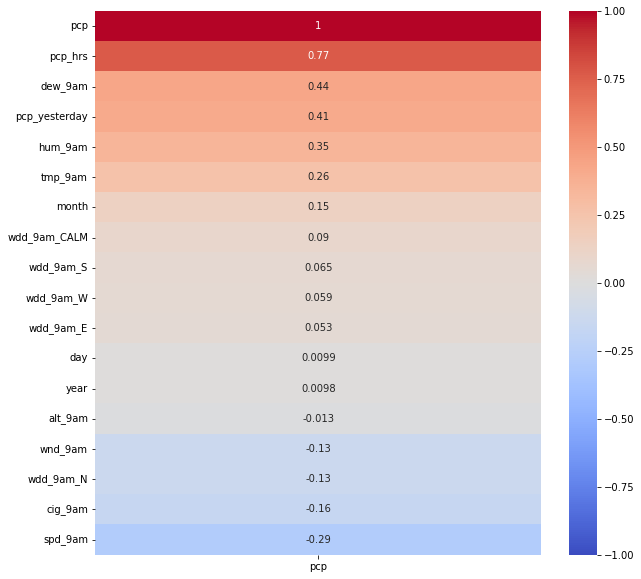

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data_corr[['pcp']].sort_values(by=['pcp'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [43]:
data_corr[['pcp']].sort_values(by=['pcp'],ascending=False)

,pcp
pcp,1.000000
pcp_hrs,0.769080
dew_9am,0.436143
pcp_yesterday,0.413329
hum_9am,0.347378
tmp_9am,0.260427
month,0.147885
wdd_9am_CALM,0.090304
wdd_9am_S,0.064914
wdd_9am_W,0.058722


In [28]:
import numpy as np

In [30]:
#removing pcp fiend and storing in variable y
y = data.pop('pcp')
y

0       0
1       0
2       0
3       0
4       0
       ..
6775    0
6776    0
6777    0
6778    0
6779    1
Name: pcp, Length: 6780, dtype: int64

In [31]:
X = data[['tmp_9am', 'dew_9am', 'hum_9am', 'pcp_yesterday', 'month']] ##features with most correlation
X

,tmp_9am,dew_9am,hum_9am,pcp_yesterday,month
0,17.0,10.0,59,0,1
1,18.2,13.2,73,0,1
2,18.0,10.5,58,0,1
3,15.2,9.2,61,0,1
4,15.0,10.0,67,0,1
...,...,...,...,...,...
6775,14.0,11.0,79,0,12
6776,14.0,10.0,71,1,12
6777,16.0,10.0,63,0,12
6778,17.0,13.0,76,0,12


In [33]:
#ML Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,tmp_9am,dew_9am,hum_9am,pcp_yesterday,month
4672,16.0,12.0,75,0,12
742,21.0,16.0,76,0,6
4867,21.0,15.0,71,0,7
3440,20.0,15.0,75,0,6
1798,22.0,13.0,59,1,8
...,...,...,...,...,...
6024,20.0,16.0,80,0,10
5695,18.0,13.0,72,0,11
3905,18.0,17.0,94,1,9
6224,22.0,16.0,73,1,5


In [47]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

array([[0.33037443, 0.66962557],
       [0.5621794 , 0.4378206 ],
       [0.45209346, 0.54790654],
       ...,
       [0.7265697 , 0.2734303 ],
       [0.97750451, 0.02249549],
       [0.26959855, 0.73040145]])

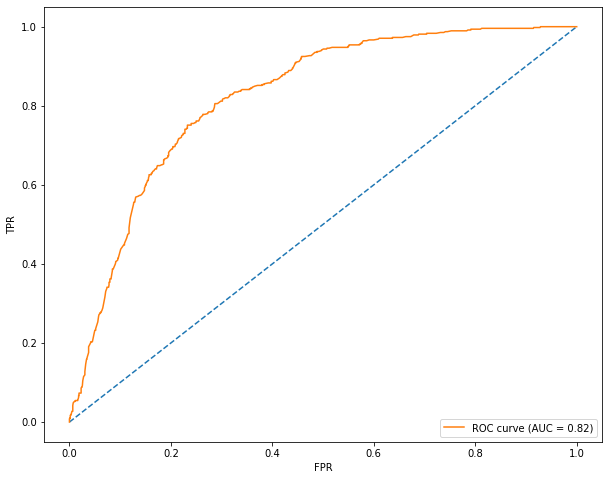

In [37]:
## evaluating Model
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

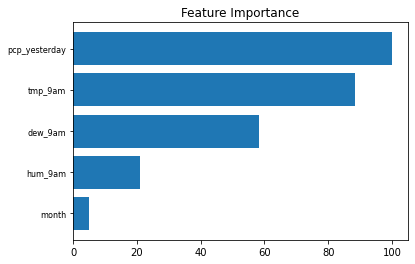

In [38]:
## feature importance

## TOP Correlations. - see above
#-------------------------------#
#dew_9am	0.436143
#pcp_yesterday	0.413329
#hum_9am	0.347378
#tmp_9am	0.260427
#month	0.147885

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

In [51]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
results

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [68]:
##prediction testing

## selection: 'tmp_9am', 'dew_9am', 'hum_9am', 'pcp_yesterday', 'month'
prediction = results.get_prediction([22,13,(13/22*100),0,5])
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.115901,0.010132,0.096039,0.135763,-0.648545,0.880348
